## ML in IT SECURITY

### Intro
With the dramatic growth of computer networks usage and the huge increase in the number of applications running on top of it, network security is becoming increasingly while the all the systems suffers from security vulnerabilities, which could increase the attacks that could negatively affects the economy.<br><br>
Therefore detecting vulnerabilities in the system in the network has been more important and need to be done as accurate as possible in real time.

### Task 
A model will be created and trained using SVM classifier to distengush if there is an attack or not in the network packet.

### Instructions 
Intrusion Detection system will be created and designed using Support Vector Machine (SVM) algorithm:
- Being able to classify the if the packets is attack or normal
- Apply all the kernels that has been mentioned in the lecture ( Gassuian, RBF, Linear, polynomial) and compare the results
- Apply Grid-search VS Random techniques to select the parameters and compare the two results

 

----------
## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix

# Turn off the warnings.
warnings.filterwarnings(action='ignore')
%matplotlib inline

------
## Reading Data

In [2]:
Trained_Data = pd.read_csv("../input/nslkdd/KDDTrain+.txt" , sep = "," , encoding = 'utf-8')
Tested_Data  = pd.read_csv("../input/nslkdd/KDDTest+.txt" , sep = "," , encoding = 'utf-8')

---------
## Exploring Data

In [3]:
Trained_Data

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [4]:
Tested_Data

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


---------
## Columns Modification

In [5]:
Columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level'])

In [6]:
Trained_Data.columns = Columns
Tested_Data.columns  = Columns

In [7]:
Trained_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [8]:
Tested_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
5,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
6,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
7,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
8,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7
9,0,tcp,telnet,SF,0,0,0,0,0,0,...,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32,mscan,9


-------
## Data Description

In [9]:
Trained_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [10]:
Tested_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [11]:
Trained_Data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [12]:
Tested_Data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,22543.000000,2.254300e+04,2.254300e+04,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,...,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,218.868784,1.039591e+04,2.056110e+03,0.000311,0.008428,0.000710,0.105399,0.021648,0.442222,0.119904,...,140.756332,0.608747,0.090541,0.132267,0.019639,0.097818,0.099430,0.233351,0.226649,18.017833
std,1407.207069,4.727969e+05,2.121976e+04,0.017619,0.142602,0.036474,0.928448,0.150331,0.496661,7.269758,...,111.783059,0.435681,0.220722,0.306274,0.085396,0.273144,0.281872,0.387204,0.400851,4.270409
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [13]:
Trained_Data.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [14]:
Tested_Data.nunique()

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate             

In [15]:
Trained_Data.max()

duration                             42908
protocol_type                          udp
service                              whois
flag                                    SH
src_bytes                       1379963888
dst_bytes                       1309937401
land                                     1
wrong_fragment                           3
urgent                                   3
hot                                     77
num_failed_logins                        5
logged_in                                1
num_compromised                       7479
root_shell                               1
su_attempted                             2
num_root                              7468
num_file_creations                      43
num_shells                               2
num_access_files                         9
num_outbound_cmds                        0
is_host_login                            1
is_guest_login                           1
count                                  511
srv_count  

In [16]:
Tested_Data.max()

duration                          57715
protocol_type                       udp
service                           whois
flag                                 SH
src_bytes                      62825648
dst_bytes                       1345927
land                                  1
wrong_fragment                        3
urgent                                3
hot                                 101
num_failed_logins                     4
logged_in                             1
num_compromised                     796
root_shell                            1
su_attempted                          2
num_root                            878
num_file_creations                  100
num_shells                            5
num_access_files                      4
num_outbound_cmds                     0
is_host_login                         1
is_guest_login                        1
count                               511
srv_count                           511
serror_rate                         1.0


-----
### Exploring Responses

In [17]:
Results = set(Trained_Data['attack'].values)
print(Results,end=" ")

{'rootkit', 'loadmodule', 'ipsweep', 'satan', 'ftp_write', 'normal', 'buffer_overflow', 'nmap', 'warezclient', 'perl', 'warezmaster', 'multihop', 'pod', 'spy', 'smurf', 'guess_passwd', 'back', 'phf', 'imap', 'neptune', 'portsweep', 'land', 'teardrop'} 

## Classifying The Attack Results

In [18]:
Trained_attack = Trained_Data.attack.map(lambda a: 0 if a == 'normal' else 1)
Tested_attack = Tested_Data.attack.map(lambda a: 0 if a == 'normal' else 1)

Trained_Data['attack_state'] = Trained_attack
Tested_Data['attack_state'] = Tested_attack

In [19]:
Trained_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


In [20]:
Tested_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,1
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21,0
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15,1
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11,1
4,0,tcp,http,SF,267,14515,0,0,0,0,...,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21,0
5,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21,0
6,0,tcp,telnet,SF,129,174,0,0,0,0,...,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15,1
7,0,tcp,http,SF,327,467,0,0,0,0,...,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21,0
8,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7,1
9,0,tcp,telnet,SF,0,0,0,0,0,0,...,0.01,0.00,0.00,0.00,0.00,0.66,0.32,mscan,9,1


--------
## Data preprocessing
### Chechking for Missing Data

In [21]:
Trained_Data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [22]:
Tested_Data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

-----
- **There is no missing data**

--------
### Checking for Duplicates

In [23]:
Trained_Data.duplicated().sum()

0

In [24]:
Tested_Data.duplicated().sum()

0

---------
- **There is no duplicated data**

-----
### Handling Outliers

In [25]:
Trained_Data.shape

(125972, 44)

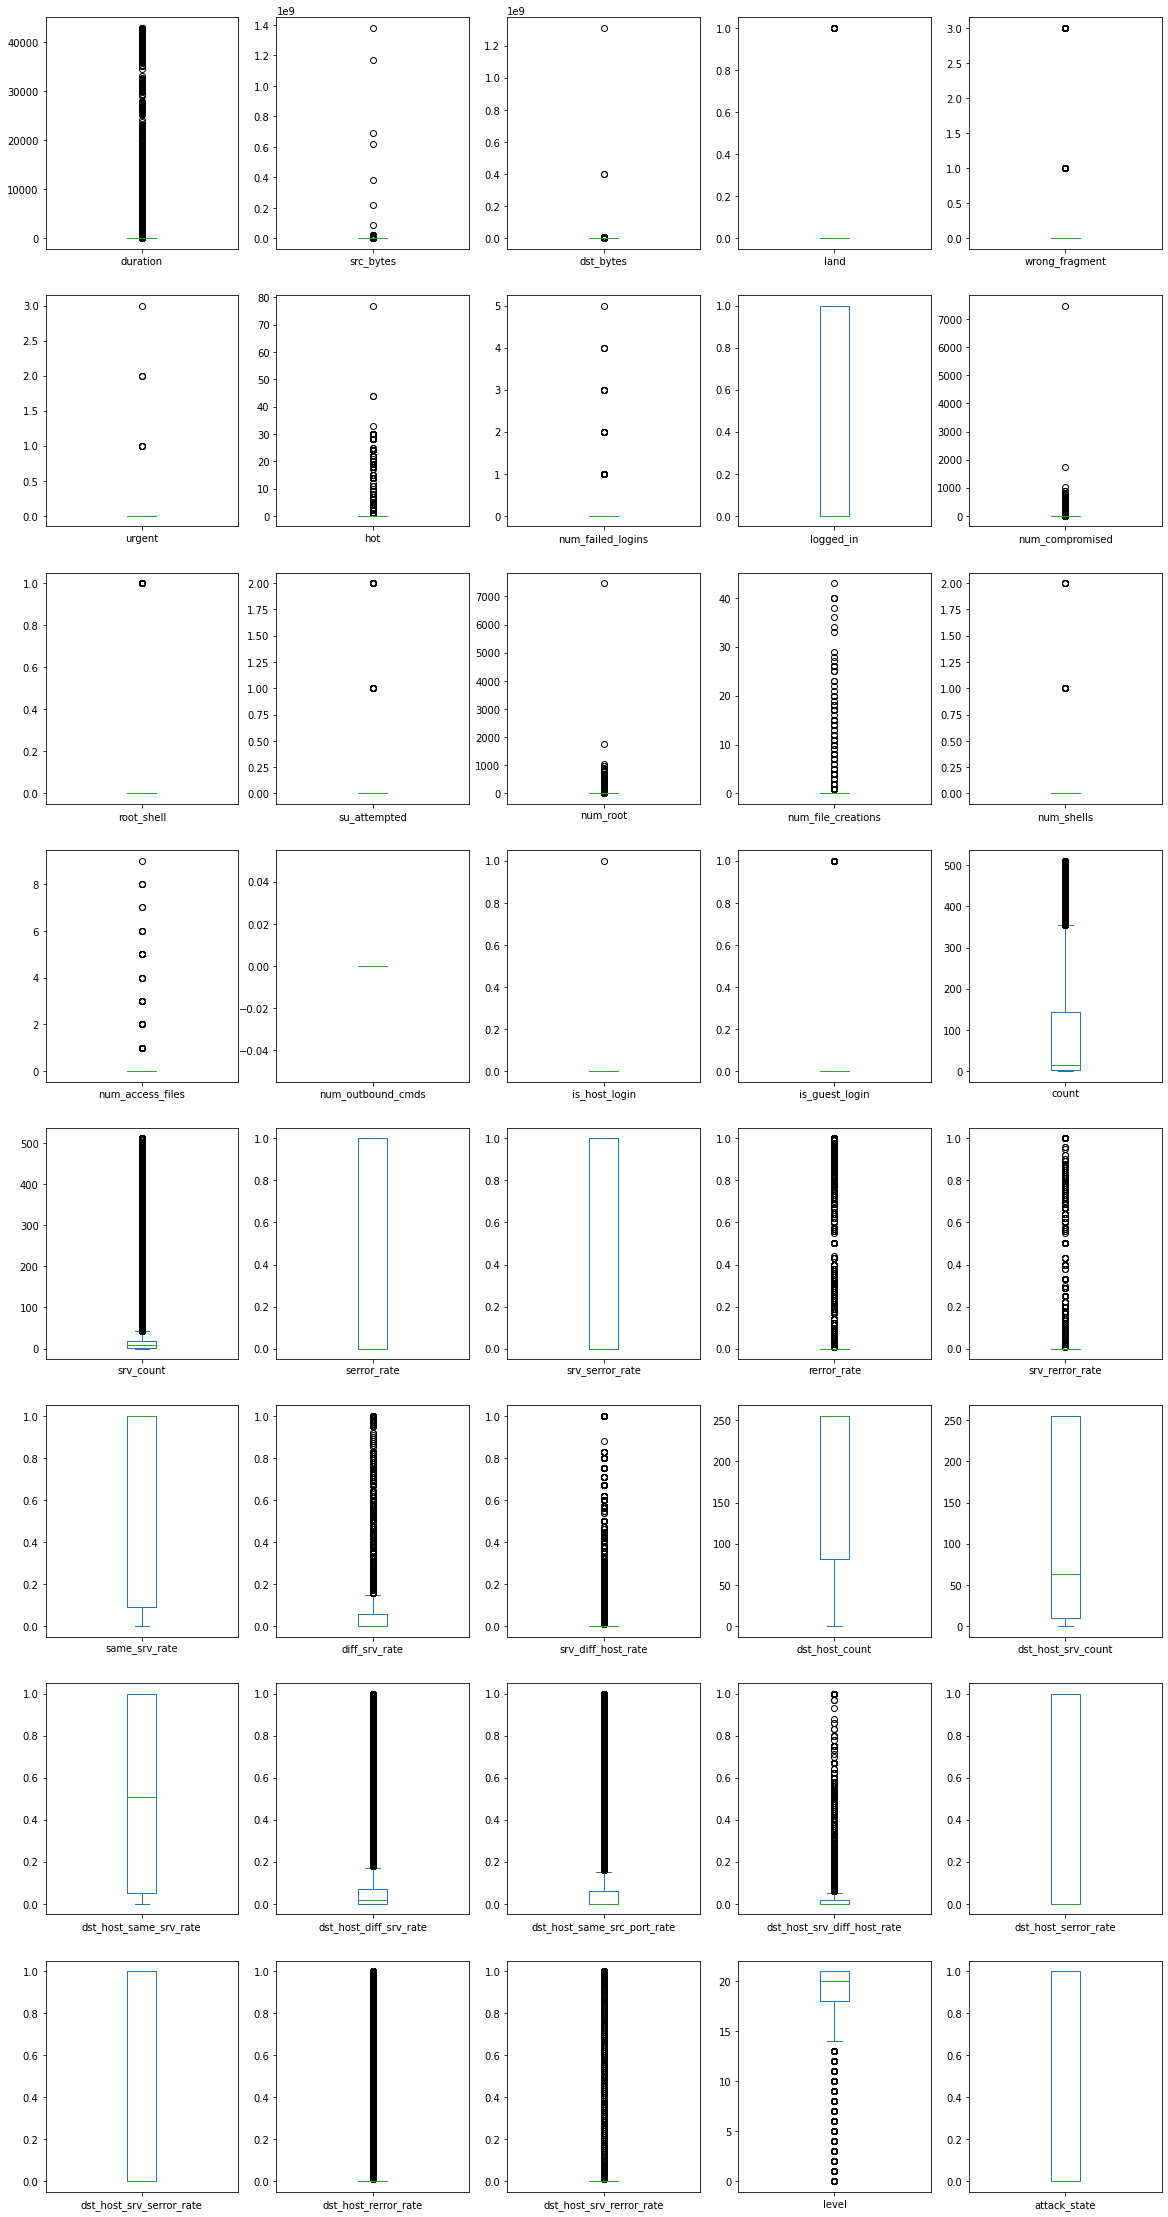

In [26]:
Trained_Data.plot(kind='box',subplots=1,layout=(8,5),figsize=(20,40))
plt.show()

In [27]:
Tested_Data.shape

(22543, 44)

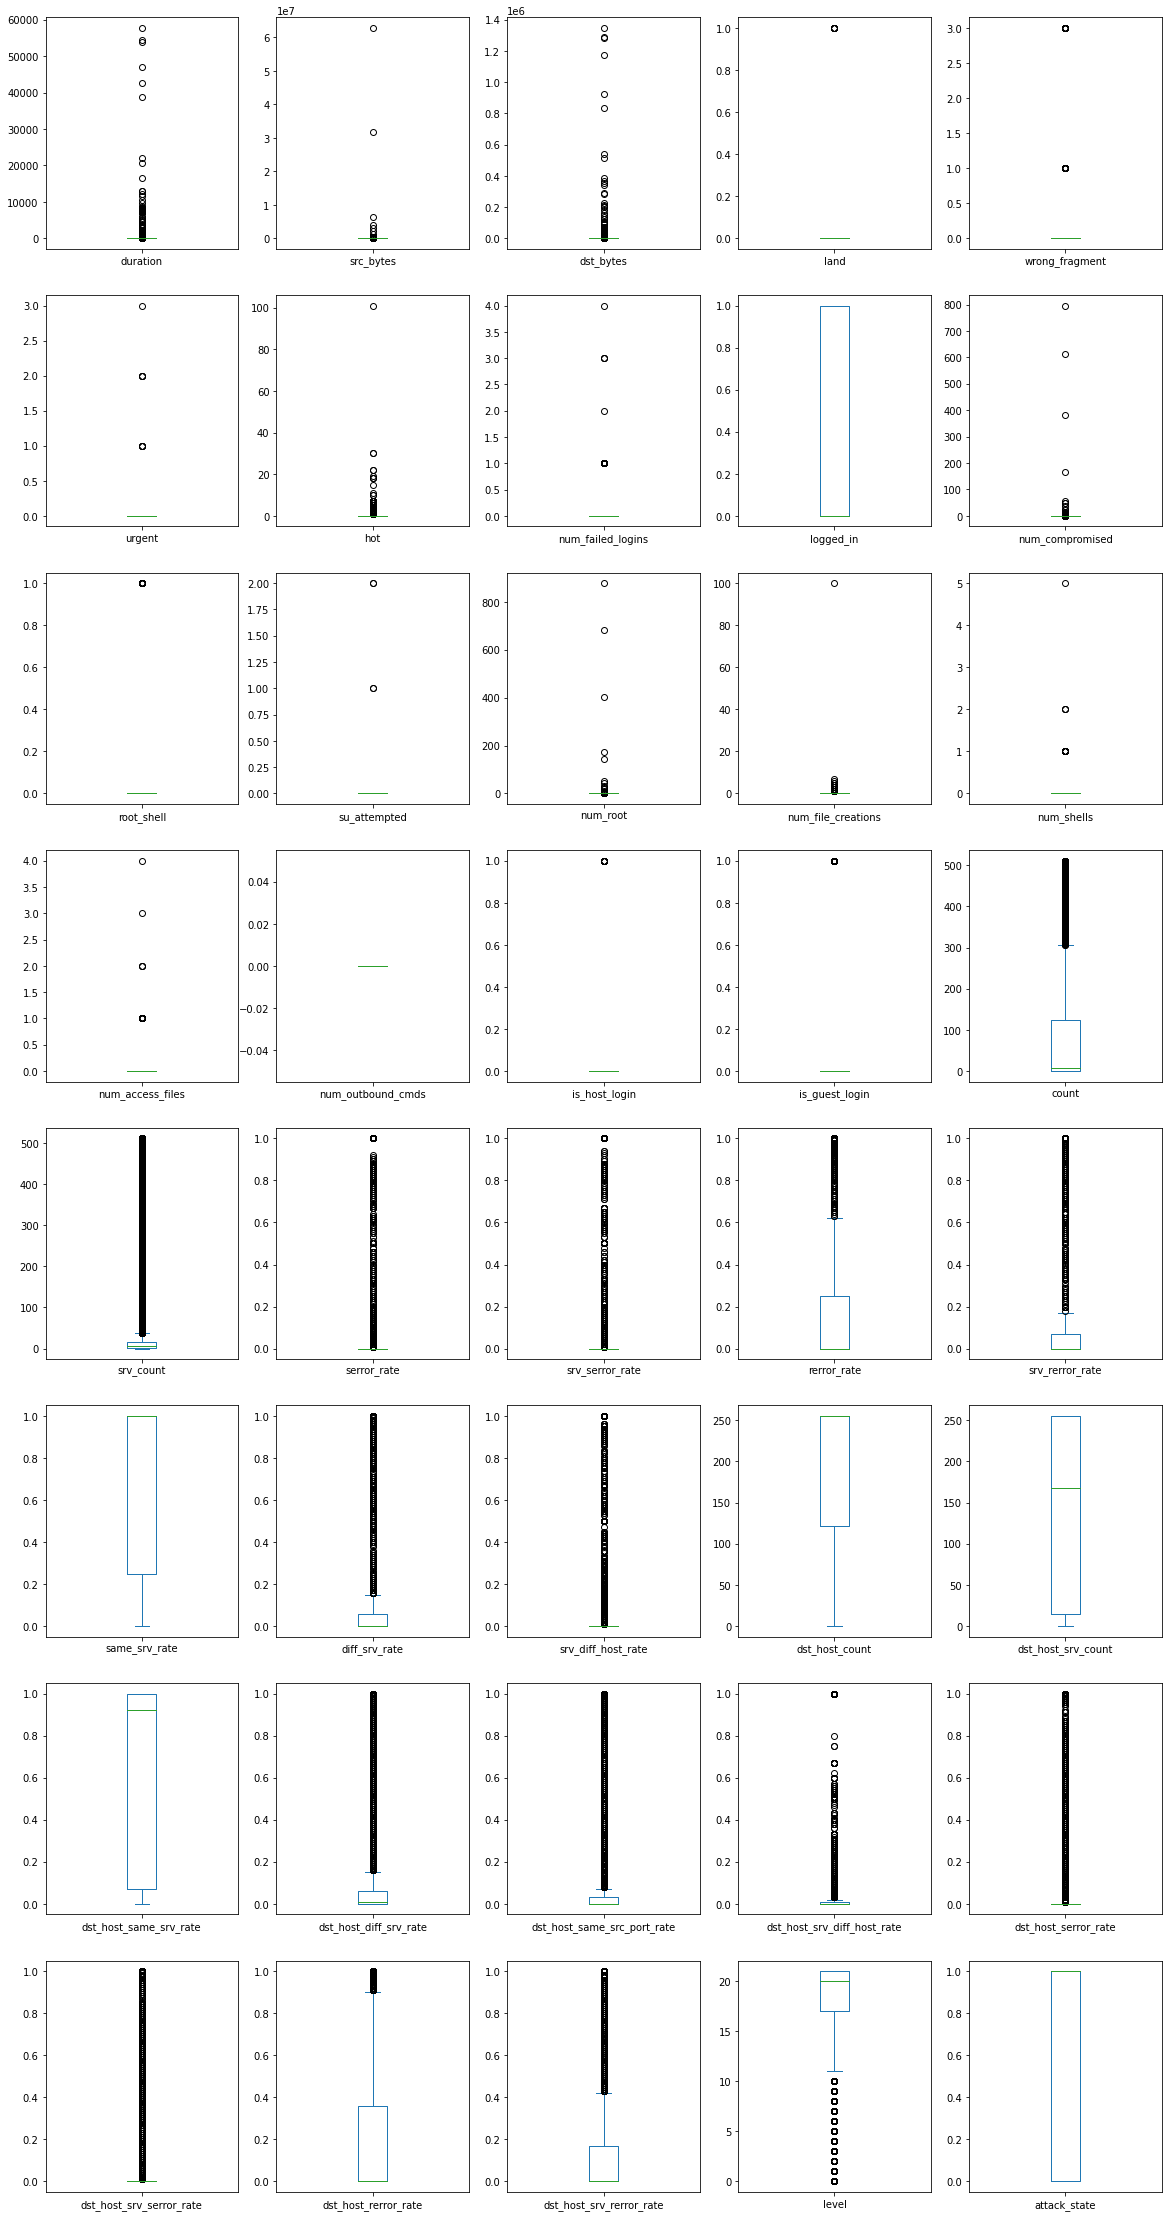

In [28]:
Tested_Data.plot(kind='box',subplots=1,layout=(8,5),figsize=(20,40))
plt.show()

-----
- **No significant outliers in the data**

-------------
## Data Encoding

In [29]:
Trained_Data = pd.get_dummies(Trained_Data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [30]:
Tested_Data = pd.get_dummies(Tested_Data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [31]:
LE = LabelEncoder()
attack_LE= LabelEncoder()
Trained_Data['attack'] = attack_LE.fit_transform(Trained_Data["attack"])
Tested_Data['attack'] = attack_LE.fit_transform(Tested_Data["attack"])

----
## Data Splitting 

In [32]:
X_train = Trained_Data.drop('attack', axis = 1)
X_train = Trained_Data.drop('level', axis = 1)
X_train = Trained_Data.drop('attack_state', axis = 1)

X_test = Tested_Data.drop('attack', axis = 1)
X_test = Tested_Data.drop('level', axis = 1)
X_test = Tested_Data.drop('attack_state', axis = 1)


Y_train = Trained_Data['attack_state']
Y_test = Tested_Data['attack_state']

In [33]:
X_train_train,X_test_train ,Y_train_train,Y_test_train = train_test_split(X_train, Y_train, test_size= 0.25 , random_state=42)
X_train_test,X_test_test,Y_train_test,Y_test_test = train_test_split(X_test, Y_test, test_size= 0.25 , random_state=42)

---------
## Data Scaling

In [34]:
Ro_scaler = RobustScaler()
X_train_train = Ro_scaler.fit_transform(X_train_train) 
X_test_train= Ro_scaler.transform(X_test_train)
X_train_test = Ro_scaler.fit_transform(X_train_test) 
X_test_test= Ro_scaler.transform(X_test_test)

In [35]:
X_train_train.shape, Y_train_train.shape

((94479, 124), (94479,))

In [36]:
X_test_train.shape, Y_test_train.shape

((31493, 124), (31493,))

In [37]:
X_train_test.shape, Y_train_test.shape

((16907, 118), (16907,))

In [38]:
X_test_test.shape, Y_test_test.shape

((5636, 118), (5636,))

------
## Working on Trained Data
### VIF 

In [39]:
A = sm.add_constant(X_train)
Est1 = sm.GLM(Y_train, A)
Est2 = Est1.fit()
Est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           attack_state   No. Observations:               125972
Model:                            GLM   Df Residuals:                   125852
Model Family:                Gaussian   Df Model:                          119
Link Function:               identity   Scale:                        0.021929
Method:                          IRLS   Log-Likelihood:                 61917.
Date:                Wed, 22 Mar 2023   Deviance:                       2759.8
Time:                        20:55:49   Pearson chi2:                 2.76e+03
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.9180      0.007    125.956      0.000       0.904       0.932
duration                    -4.783e-06      2e-07    -23.889      0.000   -5.18e-06   -4.39e-06
src_bytes                    1.217e-10   7.28e-11      1.672      0.094   -2.09e-11    2.64e-10
dst_bytes                   -1.499e-10   1.04e-10     -1.443      0.149   -3.53e-10    5.37e-11
land                           -0.3573      0.030    -11.833      0.000      -0.416      -0.298
wrong_fragment                  0.1395      0.002     68.164      0.000       0.135       0.144
urgent                         -0.0318      0.029     -1.078      0.281      -0.090       0.026
hot                             0.0125      0.000     32.250      0.000       0.012       0.013
num_failed_logins              -0.0524      0.010     -5.496      0.000      -0.071      -0.034
logged_in                       0.1497      0.003     45.118      0.000       0.143       0.156
num_compromised                 0.0030      0.001      5.775      0.000       0.002       0.004
root_shell                     -0.0419      0.015     -2.858      0.004      -0.071      -0.013
su_attempted                   -0.0386      0.015     -2.560      0.010      -0.068      -0.009
num_root                       -0.0030      0.001     -5.741      0.000      -0.004      -0.002
num_file_creations             -0.0119      0.001    -13.278      0.000      -0.014      -0.010
num_shells                     -0.1007      0.019     -5.281      0.000      -0.138      -0.063
num_access_files                0.0103      0.006      1.789      0.074      -0.001       0.022
num_outbound_cmds            1.642e-15   4.08e-16      4.028      0.000    8.43e-16    2.44e-15
is_host_login                  -0.3446      0.148     -2.326      0.020      -0.635      -0.054
is_guest_login                 -0.2940      0.011    -27.095      0.000      -0.315      -0.273
count                           0.0003   8.88e-06     30.633      0.000       0.000       0.000
srv_count                    8.915e-05   1.31e-05      6.816      0.000    6.35e-05       0.000
serror_rate                    -0.0660      0.010     -6.291      0.000      -0.087      -0.045
srv_serror_rate                 0.2799      0.011     24.504      0.000       0.258       0.302
rerror_rate                    -0.1146      0.011    -10.207      0.000      -0.137      -0.093
srv_rerror_rate                 0.5408      0.013     41.412      0.000       0.515       0.566
same_srv_rate                  -0.3671      0.004    -98.730      0.000      -0.374      -0.360
diff_srv_rate                  -0.1265      0.004    -33.960      0.000      -0.134      -0.119
srv_diff_host_rate              0.0579      0.002     27.740      0.000       0.054       0.062
dst_host_co

--------
### Data Modeling

#### Evaluating Function

In [40]:
def Evaluate(Model_Name, Model_Abb, X_test, Y_test):
    
    Pred_Value= Model_Abb.predict(X_test)
    Accuracy = metrics.accuracy_score(Y_test,Pred_Value)                      
    Sensitivity = metrics.recall_score(Y_test,Pred_Value)
    Precision = metrics.precision_score(Y_test,Pred_Value)
    F1_score = metrics.f1_score(Y_test,Pred_Value)
    Recall = metrics.recall_score(Y_test,Pred_Value)
    
    print('--------------------------------------------------\n')
    print('The {} Model Accuracy   = {}\n'.format(Model_Name, np.round(Accuracy,3)))
    print('The {} Model Sensitvity = {}\n'.format(Model_Name, np.round(Sensitivity,3)))
    print('The {} Model Precision  = {}\n'.format(Model_Name, np.round(Precision,3)))
    print('The {} Model F1 Score   = {}\n'.format(Model_Name, np.round(F1_score,3)))
    print('The {} Model Recall     = {}\n'.format(Model_Name, np.round(Recall,3)))
    print('--------------------------------------------------\n')
    
    Confusion_Matrix = metrics.confusion_matrix(Y_test, Pred_Value)
    plot_confusion_matrix(Confusion_Matrix,class_names=['Normal', 'Attack'],figsize=(5.55,5), colorbar= "blue")
    plot_roc_curve(Model_Abb, X_test, Y_test)

#### Grid Search Function

In [41]:
def GridSearch(Model_Abb, Parameters, X_train, Y_train):
    Grid = GridSearchCV(estimator=Model_Abb, param_grid= Parameters, cv = 3, n_jobs=-1)
    Grid_Result = Grid.fit(X_train, Y_train)
    Model_Name = Grid_Result.best_estimator_
    
    return (Model_Name)

#### Logistic Regression

In [42]:
LR= LogisticRegression()
LR.fit(X_train_train , Y_train_train)

LogisticRegression()

In [43]:
LR.score(X_train_train, Y_train_train), LR.score(X_test_train, Y_test_train)

(0.8858370643211719, 0.885117327660115)

--------------------------------------------------

The Logistic Regression Model Accuracy   = 0.885

The Logistic Regression Model Sensitvity = 0.886

The Logistic Regression Model Precision  = 0.871

The Logistic Regression Model F1 Score   = 0.879

The Logistic Regression Model Recall     = 0.886

--------------------------------------------------



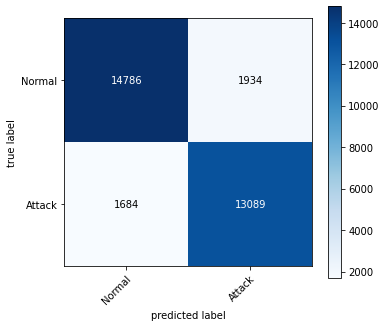

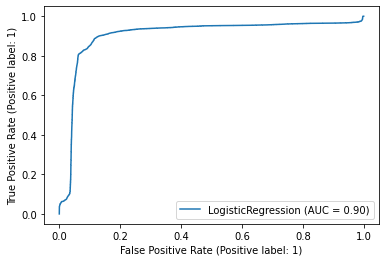

In [44]:
Evaluate('Logistic Regression', LR, X_test_train, Y_test_train)

#### Decision Tree Classifier

In [45]:
DT =DecisionTreeClassifier(max_features=6, max_depth=4)
DT.fit(X_train_train, Y_train_train)

DecisionTreeClassifier(max_depth=4, max_features=6)

In [46]:
DT.score(X_train_train, Y_train_train), DT.score(X_test_train, Y_test_train)

(0.9501158987711555, 0.9496713555393262)

--------------------------------------------------

The Decision Tree Classifier Model Accuracy   = 0.95

The Decision Tree Classifier Model Sensitvity = 0.894

The Decision Tree Classifier Model Precision  = 0.999

The Decision Tree Classifier Model F1 Score   = 0.943

The Decision Tree Classifier Model Recall     = 0.894

--------------------------------------------------



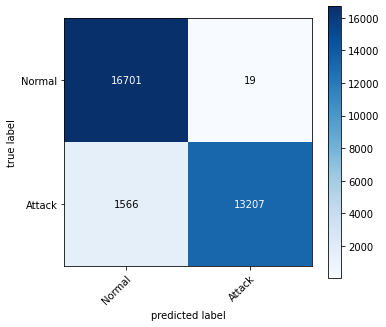

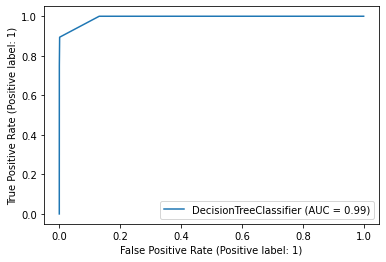

In [47]:
Evaluate('Decision Tree Classifier', DT, X_test_train, Y_test_train)

[Text(0.5769230769230769, 0.9, 'X[30] <= -0.268\ngini = 0.497\nsamples = 94479\nvalue = [50622, 43857]'),
 Text(0.38461538461538464, 0.7, 'X[22] <= 0.525\ngini = 0.258\nsamples = 43195\nvalue = [6570, 36625]'),
 Text(0.23076923076923078, 0.5, 'X[69] <= 0.5\ngini = 0.466\nsamples = 17510\nvalue = [6485, 11025]'),
 Text(0.15384615384615385, 0.3, 'X[114] <= 0.5\ngini = 0.467\nsamples = 17414\nvalue = [6485, 10929]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.487\nsamples = 11127\nvalue = [6456, 4671]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.009\nsamples = 6287\nvalue = [29, 6258]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.0\nsamples = 96\nvalue = [0, 96]'),
 Text(0.5384615384615384, 0.5, 'X[119] <= 0.5\ngini = 0.007\nsamples = 25685\nvalue = [85, 25600]'),
 Text(0.46153846153846156, 0.3, 'X[50] <= 0.5\ngini = 0.001\nsamples = 25613\nvalue = [13, 25600]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.001\nsamples = 25295\nvalue = [13, 25282]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.0\

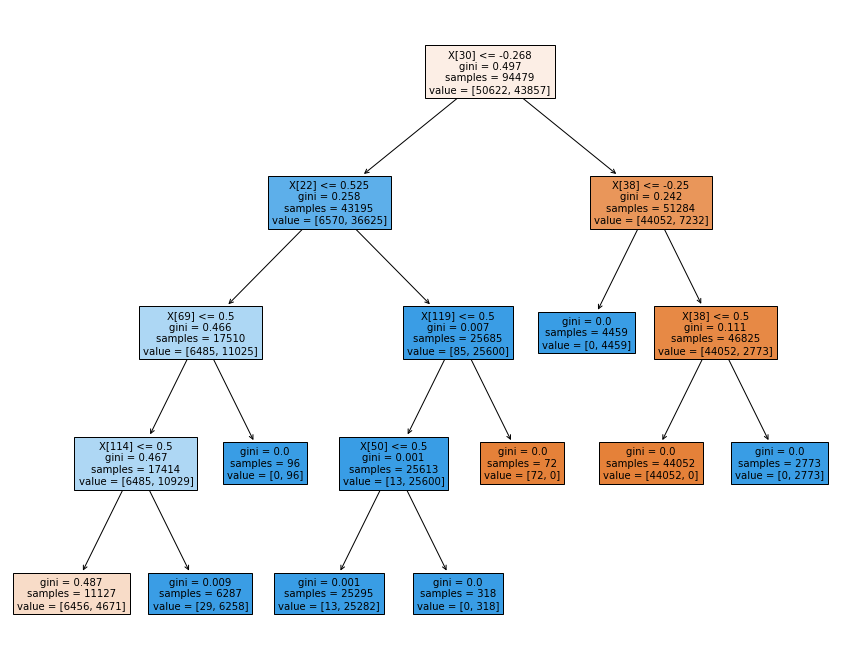

In [48]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(DT, filled=True)

#### Random Forest Classifier

In [49]:
max_depth= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    
Parameters={ 'max_depth': max_depth}

In [50]:
RF= RandomForestClassifier()
GridSearch(RF, Parameters, X_train_train, Y_train_train)

RandomForestClassifier(max_depth=11)

In [51]:
RF.fit(X_train_train, Y_train_train)

RandomForestClassifier()

In [52]:
RF.score(X_train_train, Y_train_train), RF.score(X_test_train, Y_test_train)

(1.0, 1.0)

--------------------------------------------------

The Random Forest Classifier Model Accuracy   = 1.0

The Random Forest Classifier Model Sensitvity = 1.0

The Random Forest Classifier Model Precision  = 1.0

The Random Forest Classifier Model F1 Score   = 1.0

The Random Forest Classifier Model Recall     = 1.0

--------------------------------------------------



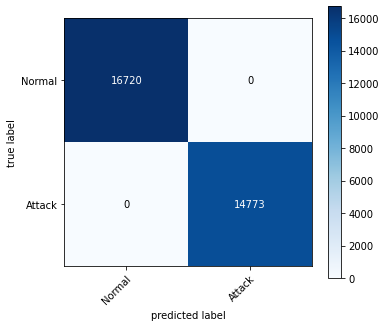

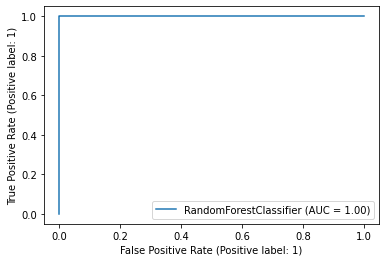

In [53]:
Evaluate('Random Forest Classifier', RF, X_test_train, Y_test_train)

#### KNN-Model

In [54]:
KNN= KNeighborsClassifier(n_neighbors=6) 
KNN.fit(X_train_train, Y_train_train)

KNeighborsClassifier(n_neighbors=6)

In [55]:
KNN.score(X_train_train, Y_train_train), KNN.score(X_test_train, Y_test_train)

(0.9957556705722965, 0.9949195059219509)

--------------------------------------------------

The KNN Model Accuracy   = 0.995

The KNN Model Sensitvity = 0.993

The KNN Model Precision  = 0.996

The KNN Model F1 Score   = 0.995

The KNN Model Recall     = 0.993

--------------------------------------------------



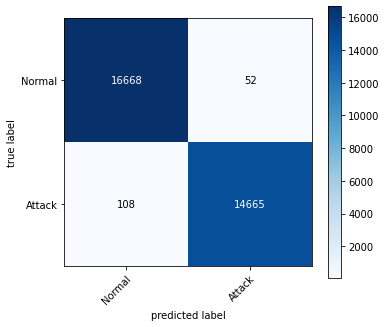

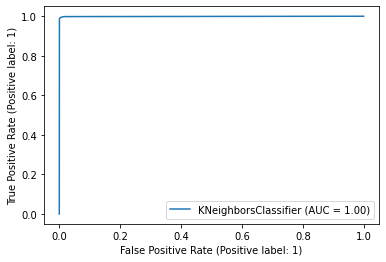

In [56]:
Evaluate('KNN', KNN, X_test_train, Y_test_train)

----------------
## SVM Classifier

### 1st Kernel

In [57]:
Linear_SVC = svm.LinearSVC(C=1)
Linear_SVC.fit(X_train_train, Y_train_train)

LinearSVC(C=1)

In [58]:
Linear_SVC.score(X_train_train, Y_train_train), Linear_SVC.score(X_test_train, Y_test_train)

(0.9799320483917061, 0.9792017273679865)

--------------------------------------------------

The SVM Linear SVC Kernel Model Accuracy   = 0.979

The SVM Linear SVC Kernel Model Sensitvity = 0.977

The SVM Linear SVC Kernel Model Precision  = 0.979

The SVM Linear SVC Kernel Model F1 Score   = 0.978

The SVM Linear SVC Kernel Model Recall     = 0.977

--------------------------------------------------



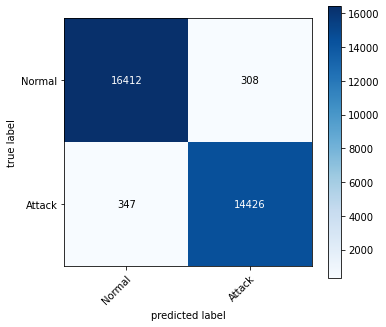

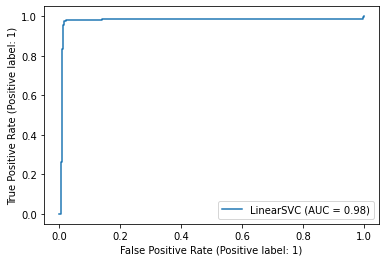

In [59]:
Evaluate('SVM Linear SVC Kernel', Linear_SVC, X_test_train, Y_test_train)